# Making LRM again
After making 2 LRM in jupyter and 1 in plain python, I am back here to make yet another LRM.

This time I am very motivated. (Also have exams in 4 days, lol.)

I now have better knowledge of
1. matplotlib, 
2. ipython,
3.  numpy, 
4. markdown, 
5. gradient descent implementation

and also some experience in the LRM implementation. 
So, I want to see how good implementation can I make.

Firstly, starting with importing some modules.

In [1]:
from sklearn.datasets import make_sparse_uncorrelated

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from matplotlib import style
style.use("ggplot")

### Generating a dataset

This generates a dataset using some sparse uncorrelated thing.

It generates a number of samples with single output.
Somehow, it doesn't generate less than 4 features, maybe it's got soemthing to do with it being sparse and uncorrelarted.

I have select only one of the feature, because I am training for single data. When I get the grasp of it, I am gonna try for more features simultaneously.

Similarly, I have also tried to wrap the data into the dataframe, and extract it back. This is just for improving the understanding of pandas for me, and to build the knowledge to use it when required.

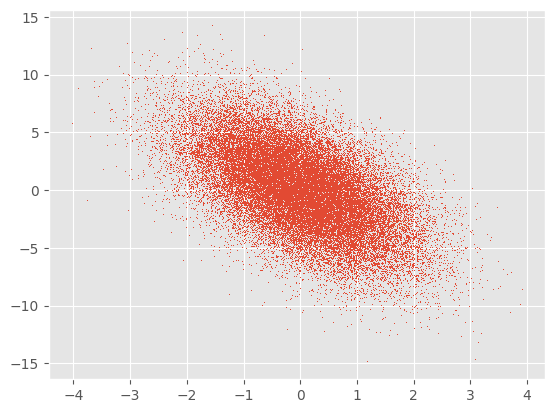

In [2]:
# Generate dataset

# can't take less than 4 features
X, y = make_sparse_uncorrelated(n_samples=40000, n_features=4); 

# only 2nd feature is relavant for me
# the -1 in reshape means infer that value
# by looking the other values
# Here, 2d datas, with each row having single column
x = X[:, 2].reshape((-1, 1))
# This particular reshaping bad for learning and coding ..
# When you don't have much experience beforehand with that.
# So reset back to original (1D data)
x = x.reshape(-1)

# wrapping into dictionary and converting to dataframe
data = {'x': x, 'y': y}
my_data = pd.DataFrame(data)

# extracting again (so useless)
a = my_data.x
b = my_data.y


plt.cla()
# plt.plot(x, y, 'x')
plt.plot(a, b, ',') # ',' for pixel plotting

plt.show()



# my_data

### Rewriting disappeared
I wrote something down here, but it disappeared somehow.
So, I am rewrithing some part of it

# The ML model class:

The class below implements the linear regression model for a single input variable (univariate) i.e. sort of $ y = a + b x $

Contains the functions to 
1. apply the model, 
2. calcualte gradient for least squared error
3. calculate gradient for l1_error
3. see the error value (least squared error and l1)
4. l1 regularization (l2 error with l1 regularization on parameters)



[ 0.21378241  0.12119191 -1.81961297 ... -2.14031554  0.16513795
  0.35547052]
[ 0.92958012  0.85299294 -0.75236384 ... -1.01763627  0.88934336
  1.04677891]


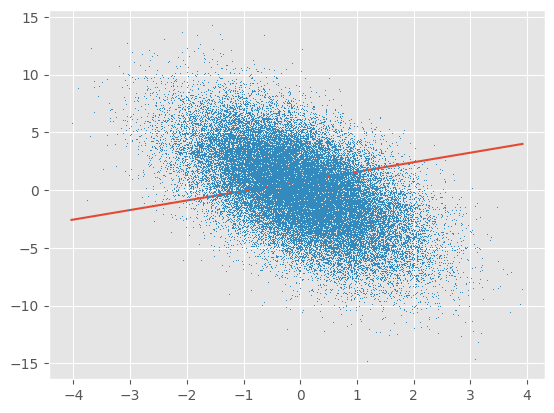

In [4]:

class linear_regression_model_univariate:
    def __init__(self):
        self.parameters = np.random.rand(2)
    
    def apply(self, x:float) -> float:
        y = self.parameters[1] * x \
            + self.parameters[0]
        return y

    def least_squared_error(self, x:float, y:float) -> float:
        lenx = len(x)
        assert(lenx == len(y))
        residue = self.apply(x) - y
        error = sum(residue ** 2) / (2 * lenx)
        return error
    
    def lse_gradient(self, x:float , y:float) -> float:
        lenx = len(x)
        assert(lenx == len(y))
        residue = self.apply(x) - y
        grada_list = residue / lenx
        gradb_list = residue / lenx * x
        grada = sum(grada_list)
        gradb = sum(gradb_list)
        return np.array([grada, gradb])
    
    def l1_error_gradient(self, x:float, y:float) -> float:
        lenx = len(x)
        assert(lenx == len(y))
        residue = self.apply(x) - y
        sign = np.sign(residue)
        grada_list = sign / (lenx * 2)
        gradb_list = sign / (lenx * 2) * x
        grada = sum(grada_list)
        gradb = sum(gradb_list)
        return np.array([grada, gradb])
    
    def l1_error(self, x: float, y:float) -> float:
        lenx = len(x)
        assert(lenx == len(y))
        residue = self.apply(x) - y
        abs(residue)
        return sum(residue) / (2 * lenx)

    def lse_with_l1_regularization_grad(self, x:float, y:float) -> float:
        lenx = len(x)
        # assert(lenx == len(y)) # Already will be checked in lse grad
        prev_grad = self.lse_gradient(x, y)
        regularization = np.sign(self.parameters) / (2 * lenx)
        return prev_grad - regularization
    
    def lse_with_l1_regularization_error(self, x:float, y:float) -> float:
        lenx = len(x)
        # assert(lenx == len(y))
        lse_error = self.least_squared_error(x, y)
        error = lse_error + sum(abs(self.parameters))/2
        return error



    # def gradient_for_other_error_function(self, x:float, y:float) -> float:
    #     could have made something, will do someday, lol
    
    
    def get_plot_points(self, X):
        X = np.array([min(X), max(X)])
        Y = self.apply(X)
        return X, Y
    

a = linear_regression_model_univariate()

# a.apply(x)
print(x)
print(a.apply(x))

# a.parameters
a.lse_gradient(x, y)
linex, liney = a.get_plot_points(x)
plt.cla()
plt.plot(linex, liney)
plt.plot(x, y, ',')
plt.show()

### Visualization part (the most interesting part)
Now I want to visualize linear regression happening

The linear regression's gradient descent happens as:
1. I calcualte the gradient of the loss function.
2. I use the gradient and the learning rate to improve the model.
3. Repeat step 1 and 2 multiple times until I get very good at predection

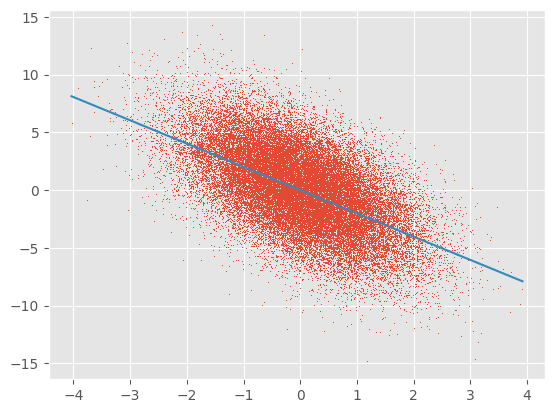

Total error = 4.110050389518811, parameters = [-0.00497857 -2.01427045]


<Figure size 640x480 with 0 Axes>

In [7]:
# Visualizing l2 (lse) error's grad descent.

from IPython.display import clear_output
my_model = linear_regression_model_univariate()
# If I keep learning rate 2, it will diverge slowly
# If I keep 5, it will explode violently
# If I keep 1, it will converge very fast
# If I keep .1, it will converge slowly
learning_rate = .1
plt.ion()
for i in range(100):
    gradient = my_model.lse_gradient(x,y)
    my_model.parameters -= learning_rate * gradient
    linex, liney = my_model.get_plot_points(x)
    error = my_model.least_squared_error(x, y)

    def display():
        plt.cla()
        plt.plot(x, y, ',')
        plt.plot(linex, liney)
        clear_output(wait = True)
        plt.show()

    display()

    print(f"Total error = {error}, parameters = {my_model.parameters}")
    plt.pause(0.01)
    plt.clf()


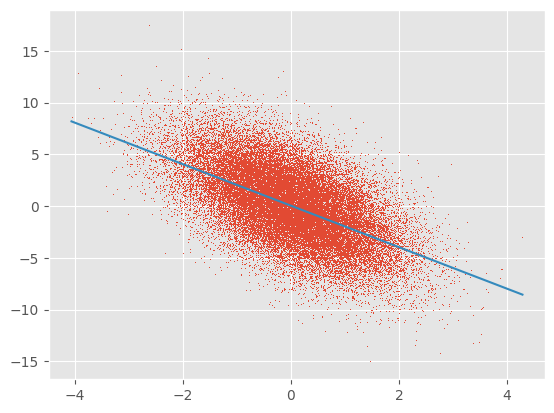

Total error = -inf, parameters = [ 0.03768869 -2.00564913]


<Figure size 640x480 with 0 Axes>

In [32]:
# Visualizing l1_error's gradient descent
from IPython.display import clear_output
my_model = linear_regression_model_univariate()
# If I keep learning rate 10, it will converge very fast
# If I keep 20 or more, it will not converge
# If I keep 1 or low, it will converge slowly
learning_rate = 1
plt.ion()
for i in range(100):
    gradient = my_model.l1_error_gradient(x,y)
    my_model.parameters -= learning_rate * gradient
    linex, liney = my_model.get_plot_points(x)
    error = my_model.l1_error(x, y)

    def display():
        plt.cla()
        plt.plot(x, y, ',')
        plt.plot(linex, liney)
        clear_output(wait = True)
        plt.show()

    display()

    print(f"Total error = {error}, parameters = {my_model.parameters}")
    plt.pause(0.01)
    plt.clf()

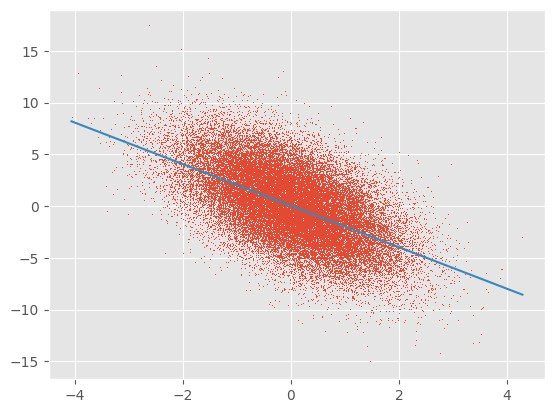

Total error = 5.15596836624061, parameters = [ 0.03804137 -2.00698259]


<Figure size 640x480 with 0 Axes>

In [49]:
# Visualizing lse error with l1 reg's gradient descent
from IPython.display import clear_output
my_model = linear_regression_model_univariate()
# If I keep learning rate 5, it will explode
# If I keep learning rate 2, it will oscillate in some values, without converging
# If I keep learning rate 1, it will converge instantly
# If I keep learning rate 0.1 or below converge slowly
learning_rate = 1
plt.ion()
for i in range(50):
    gradient = my_model.lse_with_l1_regularization_grad(x,y)
    my_model.parameters -= learning_rate * gradient
    linex, liney = my_model.get_plot_points(x)
    error = my_model.lse_with_l1_regularization_error(x, y)

    def display():
        plt.cla()
        plt.plot(x, y, ',')
        plt.plot(linex, liney)
        clear_output(wait = True)
        plt.show()

    display()

    print(f"Total error = {error}, parameters = {my_model.parameters}")
    plt.pause(0.01)
    plt.clf()